In [1]:
import keras
from keras.models import Sequential
from keras.layers import MaxPool2D,Conv2D,Flatten,Dropout,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import plotly

Using TensorFlow backend.


In [2]:
print(os.listdir("../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"))

['train', 'test']


In [3]:
meta_data = pd.read_csv("../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")
meta_data.sample(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
2644,2644,person1803_bacteria_4651.jpeg,Pnemonia,TRAIN,NaN,bacteria
1143,1143,NORMAL2-IM-1105-0001.jpeg,Normal,TRAIN,NaN,NaN
1510,1510,person1089_virus_1808.jpeg,Pnemonia,TRAIN,NaN,Virus
3353,3353,person277_virus_571.jpeg,Pnemonia,TRAIN,NaN,Virus
1432,1432,person1133_bacteria_3075.jpeg,Pnemonia,TRAIN,NaN,bacteria
3286,3286,person294_bacteria_1388.jpeg,Pnemonia,TRAIN,NaN,bacteria
67,67,IM-0207-0001.jpeg,Normal,TRAIN,NaN,NaN
2456,2456,person1449_bacteria_3746.jpeg,Pnemonia,TRAIN,NaN,bacteria
1303,1303,NORMAL2-IM-1423-0001.jpeg,Normal,TRAIN,NaN,NaN
4190,4190,person596_bacteria_2440.jpeg,Pnemonia,TRAIN,NaN,bacteria


In [4]:
train_data = meta_data[meta_data['Dataset_type'] == 'TRAIN']
test_data = meta_data[meta_data['Dataset_type'] == 'TEST']

print(f"Shape of training dataset: {train_data.shape}")
print(f"Shape of testing dataset: {test_data.shape}")

print("-----_________------Test data------_________--------")
test_data.sample(10)

Shape of training dataset: (5286, 6)
Shape of testing dataset: (624, 6)
-----_________------Test data------_________--------


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5610,5633,person134_bacteria_643.jpeg,Pnemonia,TEST,NaN,bacteria
5757,5780,person82_bacteria_405.jpeg,Pnemonia,TEST,NaN,bacteria
5591,5614,person140_bacteria_667.jpeg,Pnemonia,TEST,NaN,bacteria
5649,5672,person121_bacteria_580.jpeg,Pnemonia,TEST,NaN,bacteria
5714,5737,person99_bacteria_474.jpeg,Pnemonia,TEST,NaN,bacteria
5637,5660,person125_bacteria_594.jpeg,Pnemonia,TEST,NaN,bacteria
5405,5428,NORMAL2-IM-0300-0001.jpeg,Normal,TEST,NaN,NaN
5779,5802,person78_bacteria_378.jpeg,Pnemonia,TEST,NaN,bacteria
5799,5822,person56_virus_112.jpeg,Pnemonia,TEST,NaN,Virus
5645,5668,person122_bacteria_584.jpeg,Pnemonia,TEST,NaN,bacteria


In [5]:
#Null Values
print(f"Null values in train data:\n{train_data.isna().sum()}")

print("======================================================")

print(f"Null values in test data:\n{test_data.isna().sum()}")

Null values in train data:
Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5217
Label_1_Virus_category    1342
dtype: int64
Null values in test data:
Unnamed: 0                  0
X_ray_image_name            0
Label                       0
Dataset_type                0
Label_2_Virus_category    624
Label_1_Virus_category    234
dtype: int64


In [6]:
train_fill = train_data.fillna('unknown')

In [7]:
train_fill.sample(10)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
3190,3190,person314_bacteria_1462.jpeg,Pnemonia,TRAIN,unknown,bacteria
907,907,NORMAL2-IM-0866-0001.jpeg,Normal,TRAIN,unknown,unknown
603,603,NORMAL2-IM-0383-0001.jpeg,Normal,TRAIN,unknown,unknown
5173,5173,person914_bacteria_2839.jpeg,Pnemonia,TRAIN,unknown,bacteria
2589,2589,person153_virus_304.jpeg,Pnemonia,TRAIN,unknown,Virus
2609,2609,person152_virus_303.jpeg,Pnemonia,TRAIN,unknown,Virus
802,802,NORMAL2-IM-0686-0001.jpeg,Normal,TRAIN,unknown,unknown
1621,1621,person1028_bacteria_2960.jpeg,Pnemonia,TRAIN,unknown,bacteria
1365,1365,person1005_virus_1688.jpeg,Pnemonia,TRAIN,unknown,Virus
5160,5160,person922_bacteria_2847.jpeg,Pnemonia,TRAIN,unknown,bacteria


In [8]:
test_fill = test_data.fillna('unknown')

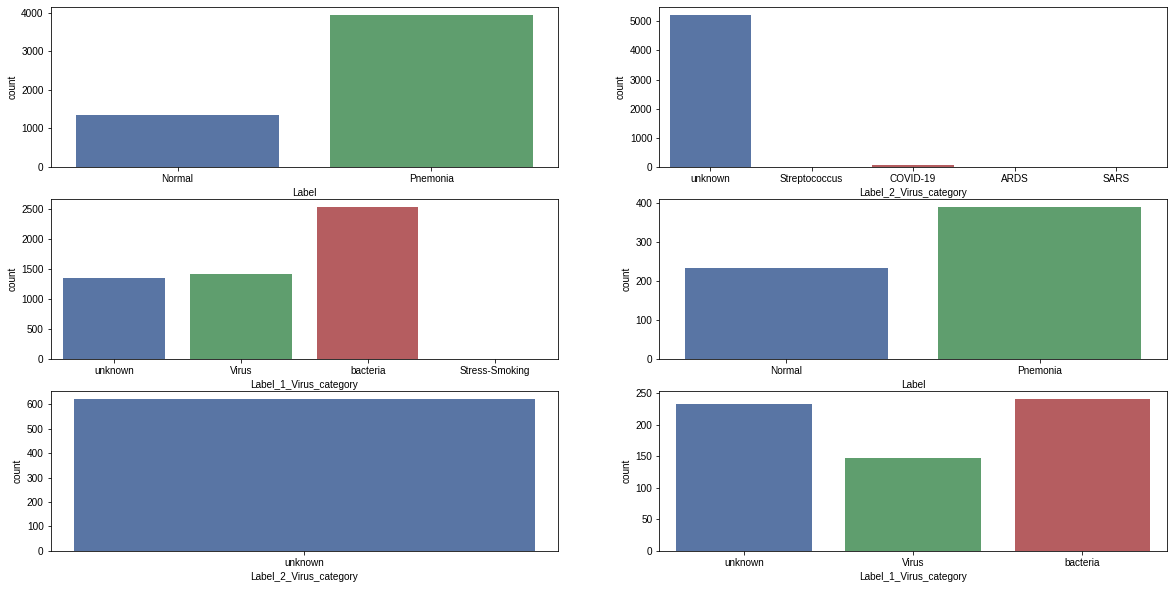

In [9]:
#labels = ['Label','Label_2_Virus_category','Label_1_Virus_category']
#With Unknown 
fig,ax = plt.subplots(3, 2, figsize=(20, 10))

plt.style.use('seaborn')

#print(labels[0])
sns.countplot('Label',data=train_fill,ax=ax[0,0])
sns.countplot('Label_2_Virus_category',data=train_fill,ax=ax[0,1])
sns.countplot('Label_1_Virus_category',data=train_fill,ax=ax[1,0])
sns.countplot('Label',data=test_fill,ax=ax[1,1])
sns.countplot('Label_2_Virus_category',data=test_fill,ax=ax[2,0])
sns.countplot('Label_1_Virus_category',data=test_fill,ax=ax[2,1])
fig.show()

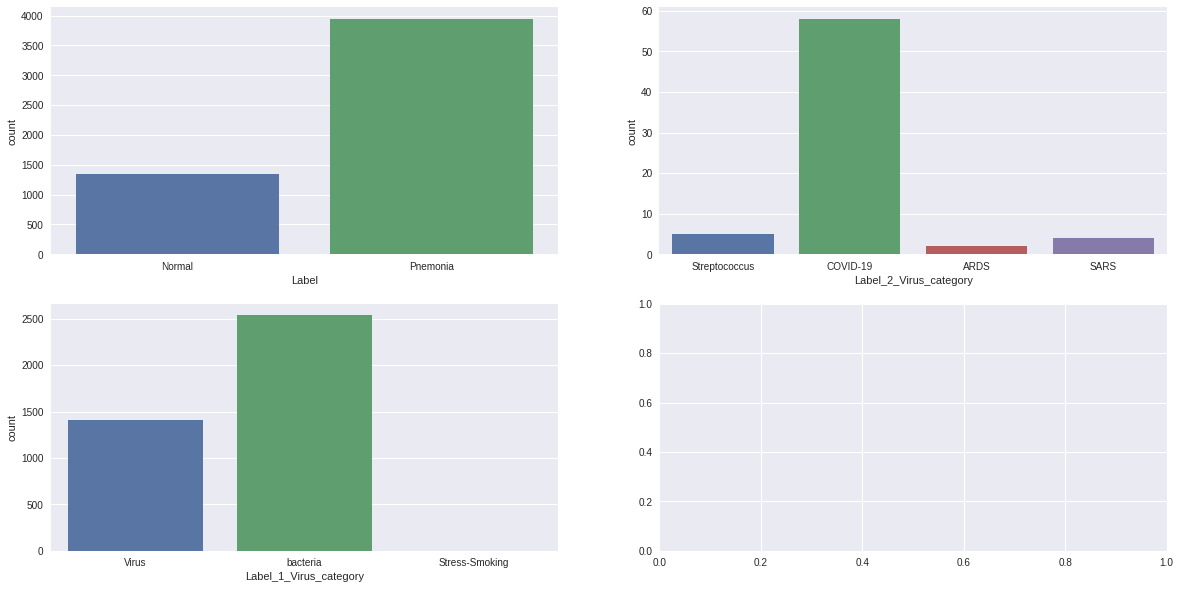

In [10]:
#Without Unknown
fig,ax = plt.subplots(2, 2, figsize=(20, 10))

plt.style.use('seaborn')

#print(labels[0])
sns.countplot('Label',data=train_data,ax=ax[0,0])
sns.countplot('Label_2_Virus_category',data=train_data,ax=ax[0,1])
sns.countplot('Label_1_Virus_category',data=train_data,ax=ax[1,0])
#sns.countplot('Label',data=test_data,ax=ax[1,1])
#sns.countplot('Label_2_Virus_category',data=test_data,ax=ax[2,0])
#sns.countplot('Label_1_Virus_category',data=test_data,ax=ax[2,1])
fig.show()

In [11]:
TEST_FOLDER = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
TRAIN_FOLDER = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

In [12]:
sample_train_imgs = list(os.walk(TRAIN_FOLDER))[0][2][:6]
sample_train_imgs

['person489_bacteria_2067.jpeg',
 'IM-0244-0001.jpeg',
 'person1717_bacteria_4536.jpeg',
 'person1338_virus_2308.jpeg',
 'IM-0166-0001.jpeg',
 'person257_bacteria_1194.jpeg']

In [13]:
sample_train_imgs = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_train_imgs))

In [14]:
sample_test_imgs = list(os.walk(TEST_FOLDER))[0][2][:6]
sample_test_imgs

['IM-0025-0001.jpeg',
 'IM-0007-0001.jpeg',
 'person78_bacteria_382.jpeg',
 'person91_bacteria_448.jpeg',
 'person92_bacteria_450.jpeg',
 'NORMAL2-IM-0305-0001.jpeg']

In [15]:
sample_test_imgs = list(map(lambda x: os.path.join(TEST_FOLDER, x), sample_test_imgs))

In [16]:
from PIL import Image

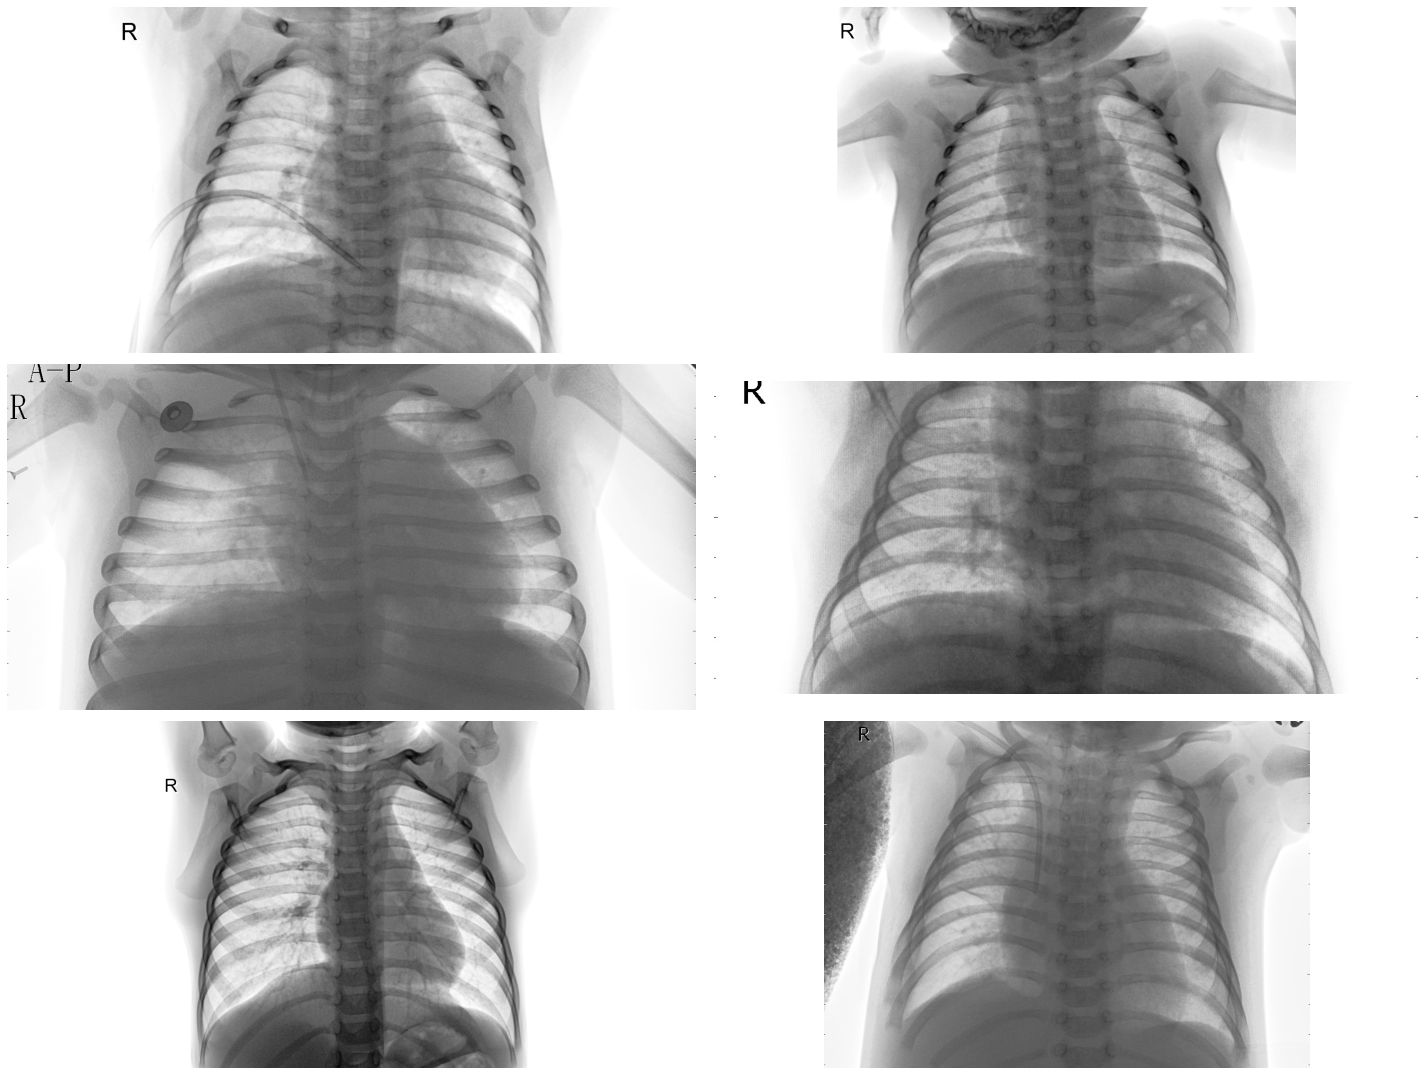

In [17]:
plt.figure(figsize=(20,20))

for iterator, filename in enumerate(sample_train_imgs):
    image = Image.open(filename)
    plt.subplot(4, 2, iterator+1)
    plt.axis('off')
    plt.imshow(image)


plt.tight_layout()

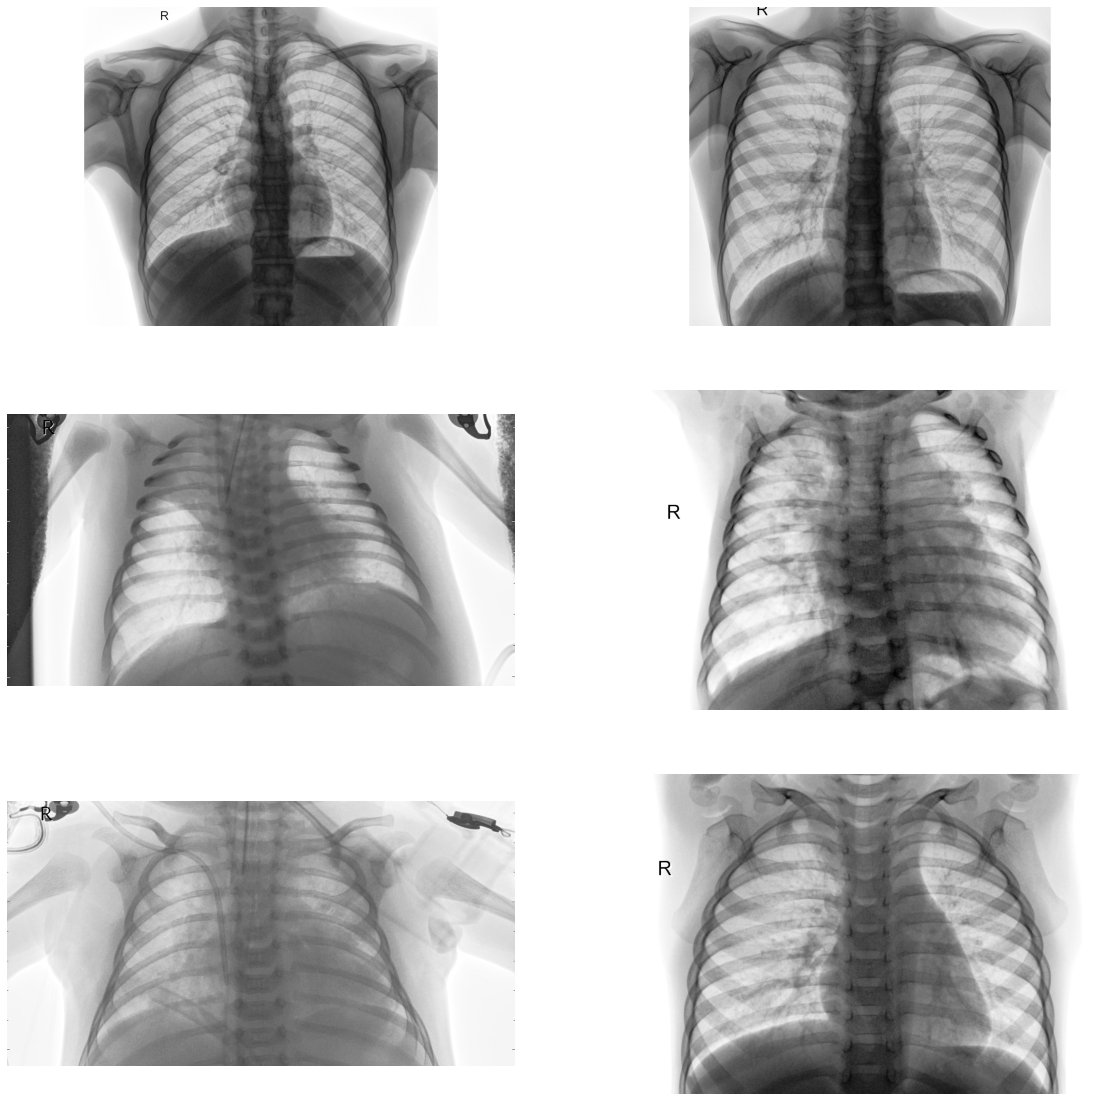

In [18]:
plt.figure(figsize=(20,20))

for i in range(len(sample_test_imgs)):
    image = Image.open(sample_test_imgs[i])
    plt.subplot(3,2,i+1)
    plt.axis("off")
    plt.imshow(image)

In [19]:
train_data.shape

(5286, 6)

In [20]:
final_train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]

In [21]:
final_train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in final_train_data['Label']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
from sklearn.utils import shuffle 
final_train_data = shuffle(final_train_data, random_state=1)

final_validation_data = final_train_data.iloc[1000:, :]
final_train_data = final_train_data.iloc[:1000, :]

print(f"Final train data shape : {final_train_data.shape}")
final_train_data.sample(10)

Final train data shape : (1000, 7)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,target
790,790,NORMAL2-IM-0619-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
355,355,IM-0545-0001-0002.jpeg,Normal,TRAIN,NaN,NaN,negative
919,919,NORMAL2-IM-0852-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
718,718,NORMAL2-IM-0566-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
1142,1142,NORMAL2-IM-1106-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
672,672,NORMAL2-IM-0453-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
260,260,IM-0465-0001.jpeg,Normal,TRAIN,NaN,NaN,negative
402,402,IM-0555-0001-0002.jpeg,Normal,TRAIN,NaN,NaN,negative
5274,5293,1-s2.0-S1684118220300682-main.pdf-003-b2.png,Pnemonia,TRAIN,COVID-19,Virus,positive
528,528,IM-0684-0001.jpeg,Normal,TRAIN,NaN,NaN,negative


In [23]:

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5]
)

test_image_generator = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_train_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)


validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

test_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=TEST_FOLDER,
    x_col='X_ray_image_name',
    target_size=(224, 224),
    shuffle=False,
    batch_size=16,
    class_mode=None
)

Found 1000 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.
Found 624 validated image filenames.


In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D((3,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((3,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((3,3)))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])

In [30]:
history = model.fit_generator(train_generator,validation_data=validation_generator,epochs=20)

Epoch 1/20


/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



125/125 [==============================] - 104s 832ms/step - loss: 0.2117 - accuracy: 0.9590 - val_loss: 0.1580 - val_accuracy: 0.9425
Epoch 2/20
125/125 [==============================] - 95s 758ms/step - loss: 0.1448 - accuracy: 0.9650 - val_loss: 0.0532 - val_accuracy: 0.9425
Epoch 3/20
125/125 [==============================] - 94s 750ms/step - loss: 0.1953 - accuracy: 0.9650 - val_loss: 0.0251 - val_accuracy: 0.9425
Epoch 4/20
125/125 [==============================] - 92s 733ms/step - loss: 0.1489 - accuracy: 0.9650 - val_loss: 0.0366 - val_accuracy: 0.9425
Epoch 5/20
125/125 [==============================] - 91s 729ms/step - loss: 0.2437 - accuracy: 0.9650 - val_loss: 6.4043 - val_accuracy: 0.9425
Epoch 6/20
125/125 [==============================] - 90s 724ms/step - loss: 0.2453 - accuracy: 0.9650 - val_loss: 0.3237 - val_accuracy: 0.9425
Epoch 7/20
125/125 [==============================] - 90s 724ms/step - loss: 0.1695 - accuracy: 0.9650 - val_loss: 0.0724 - val_accuracy: 0.

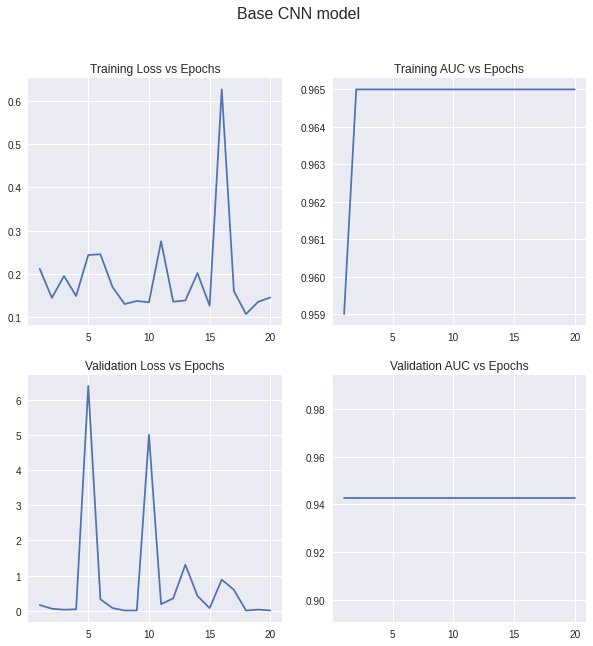

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 21), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Base CNN model', size=16)
plt.show()